# Stochastic Simulation Assignment 2

## Discrete Event Simulation - Simple Queues

_Authors: Sai Vinay Vardhan Daliparthi (15073815), Boyan Mihaylov (15067602), Nitai Nijholt (12709018)_

1) Queuing theory tells us that for FIFO scheduling the average waiting times are shorter for an
M/M/n queue and a system load ρ and processor capacity μ than for a single M/M/1 queue
with the same load characteristics (and thus an n-fold lower arrival rate). Of course, ρ must be
less than one, but the experiment only becomes interesting when ρ is not much less than one.
Look up and/or derive this theoretical result, at least for n=2. Describe how it is
derived. Can you also give a non-mathematical explanation? 

Statement to prove: $W_{n} \leq W_{1}$ 

Facts & Definitions:

1. systemload 1 server = $\rho_{1} = \frac{\lambda_{1}}{\mu} $ [1]
2. systemload n servers = $\rho_{n} = \frac{\lambda_{n}}{n\mu}$ [2]
3. It is given that the load characteristics of the system are equal, meaning $\rho_{1} = \rho_{n}$ where $\rho$ represents system load [3]
4. Little's law = $L = \lambda W$ [4]

Where \rho represents system load



From 3, we know: $\rho_{1} = \rho_{n}$ because the question gives that the load characteristics of the system are equal we assume $\mu_{1} = \mu_{n}$ 

Hence: $\rho_{1} = \rho_{n} = \frac{\lambda_{1}} {\mu}  = \frac{\lambda_{n}}{n\mu} $ [6]

From  6 we can see that:

$\lambda_{1} = \frac{\lambda_{n}}{n\mu}$, so for a system with n servers there is an n-fold lower arrival rate. [7]


We can rewrite Little law to get an expression for average waiting time W:

$W = \frac{L}{\lambda}$ [4]


We set out to prove $W_{n} \lt W_{1}$ by using 4 and rewriting Little Law, and then substituting in $\lambda$ :


$\frac{L}{\lambda_{n}}$ $\lt$ $\frac{L}{\lambda_{1}}$ 


We assume the average length of the que, $L$, is the same and using 7, we find:


$\frac{L}{\lambda_{n}}$ $\lt$  $\frac{L}{\frac{\lambda_{1}}{n}}$ 


$\frac{L}{\lambda_{n}}$  $\lt$ $\frac{nL}{\lambda_{1}}$ 

So for any n > 1, the average waiting time of a 1 server system is always higher than an n server system. This proof assumes that the system is in a steady state.

2) Write a DES program to verify this for n=1, n=2 and n=4. Make sure that your result
has a high and known statistical significance. How does the number of measurements

3) Also compare the result to that for an M/M/1 queue with shortest job first scheduling,
where you always give priority to the smallest jobs.


4) Now experiment with different service rate distributions. On the one hand try the
M/D/1 and M/D/n queues, on the other hand try a long-tail distribution. For the latter
you may e.g. use a distribution where 75% of the jobs have an exponential distribution
with an average service time of 1.0 and the remaining 25% an exponential distribution
with an average service time of 5.0 (an example of a hyperexponential distribution).
Write your program using SimPy.

## 1. Simulations

In [1]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pandas as pd
from simulation import *

### 1.1 Simulation Test: M/M/1 queue, no priority

In [2]:
env = simpy.Environment()
server = MultiServer(env, n=1, lambda_rate=0.95, mu=0.8)

env.process(server.setup_sim(print_progress=True))
env.run(until=100)

Created system with 1 servers and load 1.1874999999999998.
Job 0 arrives at queue at time 3.5765007170969243
Job 0 is starting to be processed at time 3.5765007170969243
Job 0 is finished at 4.078129210637552
Job 1 arrives at queue at time 7.441606528850162
Job 1 is starting to be processed at time 7.441606528850162
Job 1 is finished at 8.303091879278613
Job 2 arrives at queue at time 8.87301063522235
Job 2 is starting to be processed at time 8.87301063522235
Job 2 is finished at 9.471320454568742
Job 3 arrives at queue at time 9.718531668187726
Job 3 is starting to be processed at time 9.718531668187726
Job 4 arrives at queue at time 9.876726193969922
Job 3 is finished at 10.118741240290284
Job 4 is starting to be processed at time 10.118741240290284
Job 5 arrives at queue at time 10.1271780333189
Job 4 is finished at 12.071591950395161
Job 5 is starting to be processed at time 12.071591950395161
Job 5 is finished at 12.591536969401217
Job 6 arrives at queue at time 14.383138988896
Jo

In [3]:
server.jobs

,jobID,arr_time,proc_time,leave_time,wait_delta
0,0000,3.576501,3.576501,4.078129,0.0
1,0001,7.441607,7.441607,8.303092,0.0
2,0002,8.873011,8.873011,9.47132,0.0
3,0003,9.718532,9.718532,10.118741,0.0
4,0004,9.876726,10.118741,12.071592,0.242015
...,...,...,...,...,...
84,0084,90.929066,None,None,None
85,0085,92.546766,None,None,None
86,0086,96.153296,None,None,None
87,0087,96.969216,None,None,None


In [4]:
# Filter completed jobs
completed_jobs = server.jobs[server.jobs['proc_time'].isnull() == False]

print(completed_jobs)
waiting_times = completed_jobs['proc_time'] - completed_jobs['arr_time']
print(f"Average waiting time: {np.mean(waiting_times)}")

   jobID   arr_time  proc_time leave_time wait_delta
0   0000   3.576501   3.576501   4.078129        0.0
1   0001   7.441607   7.441607   8.303092        0.0
2   0002   8.873011   8.873011    9.47132        0.0
3   0003   9.718532   9.718532  10.118741        0.0
4   0004   9.876726  10.118741  12.071592   0.242015
..   ...        ...        ...        ...        ...
64  0064  66.304276  93.144625  96.730899  26.840349
65  0065  68.866196  96.730899  96.757256  27.864702
66  0066  72.738148  96.757256  98.034579  24.019108
67  0067  73.525864  98.034579  98.485825  24.508715
68  0068  73.946952  98.485825       None  24.538874

[69 rows x 5 columns]
Average waiting time: 12.97235979086304


### 1.2 Simulation Test: M/M/1 queue with priority

In [5]:
env = simpy.Environment()
server = MultiServerPriority(env, n=1, lambda_rate=0.95, mu=0.8)

env.process(server.setup_sim(print_progress=True))
env.run(until=100)

Created system with 1 servers and load 1.1874999999999998.
Job 0 arrives at queue at time 0.2775769117140428
Job 0 is starting to be processed at time 0.2775769117140428
Job 0 is finished at 1.22341251881209
Job 1 arrives at queue at time 1.9523043741305441
Job 1 is starting to be processed at time 1.9523043741305441
Job 2 arrives at queue at time 2.1591593001190956
Job 3 arrives at queue at time 2.1637275705690318
Job 1 is finished at 2.515689700764514
Job 2 is starting to be processed at time 2.515689700764514
Job 2 is finished at 3.5867417834402433
Job 3 is starting to be processed at time 3.5867417834402433
Job 4 arrives at queue at time 3.642007729589311
Job 5 arrives at queue at time 6.46369820277736
Job 6 arrives at queue at time 7.26646375591139
Job 3 is finished at 8.268218618581637
Job 4 is starting to be processed at time 8.268218618581637
Job 4 is finished at 8.284000473930286
Job 6 is starting to be processed at time 8.284000473930286
Job 6 is finished at 8.476868403897793

Job 41 is finished at 64.31671053667516
Job 50 is starting to be processed at time 64.31671053667516
Job 51 arrives at queue at time 64.35824461832613
Job 50 is finished at 64.78961570368682
Job 49 is starting to be processed at time 64.78961570368682
Job 52 arrives at queue at time 64.8839687937434
Job 53 arrives at queue at time 65.13364475298258
Job 49 is finished at 65.88940075768174
Job 52 is starting to be processed at time 65.88940075768174
Job 52 is finished at 66.09380451205527
Job 53 is starting to be processed at time 66.09380451205527
Job 53 is finished at 66.54823790973624
Job 48 is starting to be processed at time 66.54823790973624
Job 54 arrives at queue at time 67.54579311537778
Job 55 arrives at queue at time 67.76333782367479
Job 56 arrives at queue at time 68.15311070904421
Job 57 arrives at queue at time 68.60370325194825
Job 48 is finished at 68.77246355236757
Job 54 is starting to be processed at time 68.77246355236757
Job 54 is finished at 68.96648225516397
Job 5

In [6]:
server.jobs

,jobID,arr_time,proc_time,leave_time,wait_delta
0,0000,0.277577,0.277577,1.223413,0.0
1,0001,1.952304,1.952304,2.51569,0.0
2,0002,2.159159,2.51569,3.586742,0.35653
3,0003,2.163728,3.586742,8.268219,1.423014
4,0004,3.642008,8.268219,8.284,4.626211
...,...,...,...,...,...
86,0086,94.386686,None,None,None
87,0087,94.465426,97.898137,99.99684,3.43271
88,0088,95.446928,95.880621,95.931563,0.433693
89,0089,98.881715,None,None,None


### 1.3 M/M/n Simulations with Varying $\rho$

The following procedure runs multiple simulations for $M/M/n$ systems with $n = 1, 2, 4$. Furthermore, different arrival rates are explored ($0.1<\lambda<0.95$ per server), the rate being scaled to the number of servers, so that the total system load $\rho$ is comparable between the different system sizes.

In [7]:
# Simulation parameters
n_range = [1, 2, 4]
mu_base = 1.0
lambda_range = np.arange(0.2, 1.0, 0.1)
extended_lambda_range = np.append(lambda_range, 0.99)
rho_range = extended_lambda_range / mu_base
runtime = 1000
n_sims = 100

np.random.seed(13)

In [8]:
print(rho_range)

[0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.99]


In [9]:
# Run simulations for different number of servers n and for different arrival rates
sim_results = pd.DataFrame(columns=['n', 'rho', 'simID', 'jobID', 'arr_time', 'proc_time', 'leave_time', 'wait_delta'])

for n in n_range:
    for i, lambda_rate in enumerate(lambda_range):
        for s in range(n_sims):
            
            run_results = run_simulation('M/M/n', n, s, runtime, lambda_rate=lambda_rate, mu=mu_base)
            sim_results = pd.concat([sim_results, run_results], ignore_index=True)

sim_results.to_csv(f"sim_results_MMn_t_{runtime}.csv")

sim_results

Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers an

KeyboardInterrupt: 

In [10]:
# Load data from previous experiment
sim_results = pd.read_csv(f"sim_results_MMn_t_{runtime}.csv", index_col=0)
sim_results

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta
0,1,0.2,0,0,5.992343,5.992343,6.191151,0.000000
1,1,0.2,0,1,6.529411,6.529411,6.922893,0.000000
2,1,0.2,0,2,7.273650,7.273650,7.454924,0.000000
3,1,0.2,0,3,14.736495,14.736495,15.187463,0.000000
4,1,0.2,0,4,14.886542,15.187463,17.319746,0.300921
...,...,...,...,...,...,...,...,...
3078482,4,0.9,99,3664,999.090359,NaN,NaN,NaN
3078483,4,0.9,99,3665,999.194981,NaN,NaN,NaN
3078484,4,0.9,99,3666,999.320800,NaN,NaN,NaN
3078485,4,0.9,99,3667,999.854351,NaN,NaN,NaN


Mean waiting time for 1 servers rho = 0.9000000000000001: 7.54823433601617
Mean waiting time for 2 servers rho = 0.9000000000000001: 3.839231545232693
Mean waiting time for 4 servers rho = 0.9000000000000001: 1.9148703394946673


Text(0.5, 1.0, 'M/M/n, average mean Waiting time for different $\\rho$ across 100')

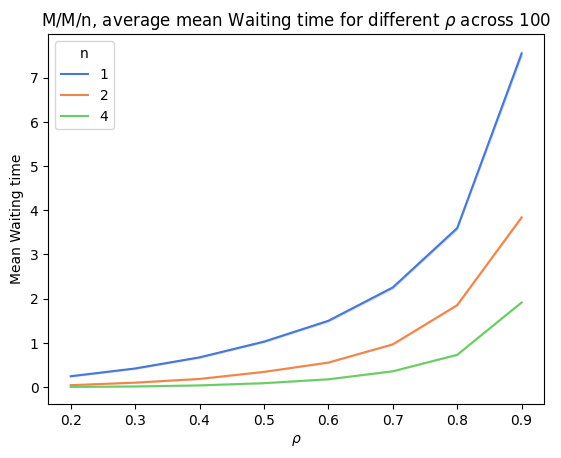

In [11]:
# Plot convergence of waiting time with increasing rho

rho_observed = sim_results['rho'].max()

sim_results_subset = sim_results[sim_results['rho'] == rho_observed]
for n in n_range:
    sim_results_subset_n = sim_results_subset[sim_results_subset['n'] == n]
    print(f"Mean waiting time for {n} servers rho = {rho_observed}: {sim_results_subset_n['wait_delta'].mean()}")

fig, ax = plt.subplots()
sns.lineplot(sim_results, x='rho', y='wait_delta', palette='muted', hue='n', errorbar=('ci', 95), ax=ax)
ax.set_xlabel('$\\rho$')
ax.set_ylabel('Mean Waiting time')
ax.set_title(f'M/M/n, average mean Waiting time for different $\\rho$ across {n_sims}')
# ax.invert_yaxis()

### 1.4 M/M/1-Priority Simulations with Varying $\rho$

The following procedure repeats the experiment for an $M/M/1$ queue with priority based on the job duration.

In [12]:
# Run simulations for different number of servers n and for different arrival rates
sim_results_priority = pd.DataFrame(columns=['n', 'rho', 'simID', 'jobID', 'arr_time', 'proc_time', 'leave_time', 'wait_delta'])

for n in n_range:
    for i, lambda_rate in enumerate(lambda_range):
        for s in range(n_sims):
            
            run_results = run_simulation('M/M/n-Priority', n, s, runtime, lambda_rate=lambda_rate, mu=mu_base)
            sim_results_priority = pd.concat([sim_results_priority, run_results], ignore_index=True)

sim_results_priority.to_csv(f"sim_results_MMn_priority_t_{runtime}.csv")

sim_results_priority

Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers an

KeyboardInterrupt: 

In [13]:
# Load data from previous experiment
sim_results_priority = pd.read_csv(f"sim_results_MMn_Priority_t_{runtime}.csv", index_col=0)
sim_results_priority

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta
0,1,0.2,0,0,2.553071,2.553071,2.617752,0.000000
1,1,0.2,0,1,4.533587,4.533587,5.367334,0.000000
2,1,0.2,0,2,6.795840,6.795840,7.963116,0.000000
3,1,0.2,0,3,11.206193,11.206193,11.911122,0.000000
4,1,0.2,0,4,13.150413,13.150413,13.601816,0.000000
...,...,...,...,...,...,...,...,...
3079999,4,0.9,99,3650,999.227109,999.345580,999.933067,0.118471
3080000,4,0.9,99,3651,999.398054,999.443704,999.538618,0.045650
3080001,4,0.9,99,3652,999.409124,999.933067,NaN,0.523943
3080002,4,0.9,99,3653,999.484882,999.538618,999.898068,0.053736


Mean waiting time an M/M/1 system without service-time priority and rho = 0.9000000000000001: 7.54823433601617
Mean waiting time an M/M/1 system with service-time priority and rho = 0.9000000000000001: 1.2710005801368396


C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\3984944414.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(sim_results_priority, x='rho', y='wait_delta', palette='muted', errorbar=('ci', 95), ax=ax, label='1 (priority)')


Text(0.5, 1.0, 'M/M/n, average mean Waiting time for different $\\rho$ across 100')

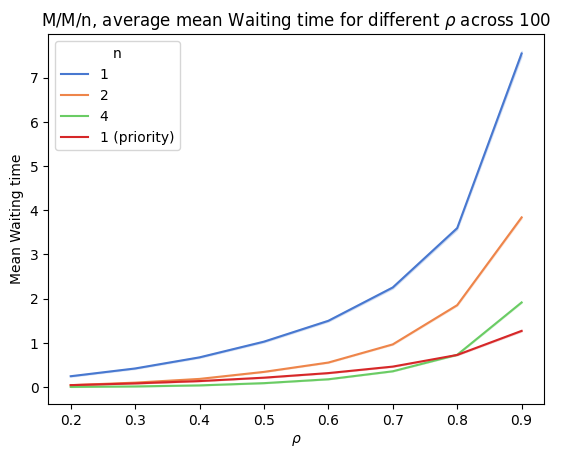

In [14]:
# Plot convergence of waiting time with increasing rho

rho_observed = sim_results['rho'].max()

sim_results_subset_A = sim_results[(sim_results['rho'] == rho_observed) & (sim_results['n'] == 1)]
sim_results_subset_B = sim_results_priority[sim_results_priority['rho'] == rho_observed]
print(f"Mean waiting time an M/M/1 system without service-time priority and rho = {rho_observed}: {sim_results_subset_A['wait_delta'].mean()}")
print(f"Mean waiting time an M/M/1 system with service-time priority and rho = {rho_observed}: {sim_results_subset_B['wait_delta'].mean()}")

fig, ax = plt.subplots()
sns.lineplot(sim_results, x='rho', y='wait_delta', palette='muted', hue='n', errorbar=('ci', 95), ax=ax)
sns.lineplot(sim_results_priority, x='rho', y='wait_delta', palette='muted', errorbar=('ci', 95), ax=ax, label='1 (priority)')
ax.legend(title='n')
ax.set_xlabel('$\\rho$')
ax.set_ylabel('Mean Waiting time')
ax.set_title(f'M/M/n, average mean Waiting time for different $\\rho$ across {n_sims}')

### 1.5 M/D/n Simulations with Varying $\rho$

In [ ]:
# Run simulations for different number of servers n and for different arrival rates
sim_results_determ = pd.DataFrame(columns=['n', 'rho', 'simID', 'jobID', 'arr_time', 'proc_time', 'leave_time', 'wait_delta'])

for n in n_range:
    for i, lambda_rate in enumerate(lambda_range):
        for s in range(n_sims):
            run_results = run_simulation('M/D/n', n, s, runtime, lambda_rate=lambda_rate, mu=mu_base)
            sim_results_determ = pd.concat([sim_results_determ, run_results], ignore_index=True)

sim_results_determ.to_csv(f"sim_results_MDn_t_{runtime}.csv")

sim_results_determ

Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers an

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta
0,1,0.2,0,0000,3.832272,3.832272,4.832272,0.0
1,1,0.2,0,0001,7.227416,7.227416,8.227416,0.0
2,1,0.2,0,0002,10.454573,10.454573,11.454573,0.0
3,1,0.2,0,0003,11.58154,11.58154,12.58154,0.0
4,1,0.2,0,0004,18.023995,18.023995,19.023995,0.0
...,...,...,...,...,...,...,...,...
3077428,4,0.9,99,3643,998.132501,998.720695,999.720695,0.588194
3077429,4,0.9,99,3644,998.417299,999.063065,None,0.645765
3077430,4,0.9,99,3645,998.532351,999.155221,None,0.62287
3077431,4,0.9,99,3646,998.841017,999.31162,None,0.470603


In [15]:
# Load data from previous experiment
sim_results_determ = pd.read_csv(f"sim_results_MDn_t_{runtime}.csv", index_col=0)
sim_results_determ

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta
0,1,0.2,0,0,3.832272,3.832272,4.832272,0.000000
1,1,0.2,0,1,7.227416,7.227416,8.227416,0.000000
2,1,0.2,0,2,10.454573,10.454573,11.454573,0.000000
3,1,0.2,0,3,11.581540,11.581540,12.581540,0.000000
4,1,0.2,0,4,18.023995,18.023995,19.023995,0.000000
...,...,...,...,...,...,...,...,...
3077428,4,0.9,99,3643,998.132501,998.720695,999.720695,0.588194
3077429,4,0.9,99,3644,998.417299,999.063065,NaN,0.645765
3077430,4,0.9,99,3645,998.532351,999.155221,NaN,0.622870
3077431,4,0.9,99,3646,998.841017,999.311620,NaN,0.470603


Mean waiting time for 1 servers rho = 0.9000000000000001: 3.870210674443616
Mean waiting time for 2 servers rho = 0.9000000000000001: 2.1124935933659716
Mean waiting time for 4 servers rho = 0.9000000000000001: 0.9773548651504239


Text(0.5, 1.0, 'M/D/n, average mean Waiting time for different $\\rho$ across 100')

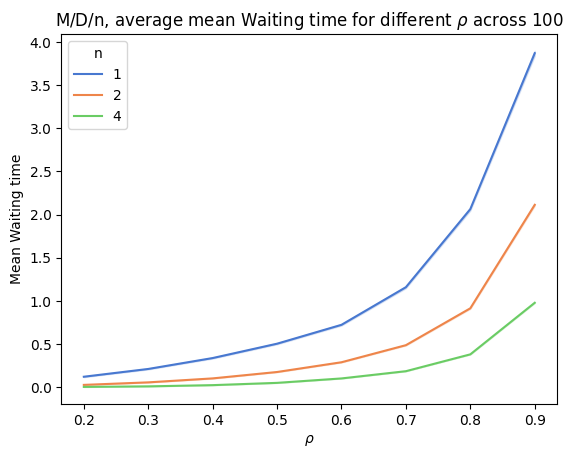

In [16]:
# Plot convergence of waiting time with increasing rho (M/D/n)

rho_observed = sim_results_determ['rho'].max()

sim_results_subset = sim_results_determ[sim_results_determ['rho'] == rho_observed]
for n in n_range:
    sim_results_subset_n = sim_results_subset[sim_results_subset['n'] == n]
    print(f"Mean waiting time for {n} servers rho = {rho_observed}: {sim_results_subset_n['wait_delta'].mean()}")

fig, ax = plt.subplots()
sns.lineplot(sim_results_determ, x='rho', y='wait_delta', palette='muted', hue='n', errorbar=('ci', 95), ax=ax)
ax.set_xlabel('$\\rho$')
ax.set_ylabel('Mean Waiting time')
ax.set_title(f'M/D/n, average mean Waiting time for different $\\rho$ across {n_sims}')
# ax.invert_yaxis()

### 1.6 M/H/n Simulations with Varying $\rho$

In [ ]:
# Run simulations for different number of servers n and for different arrival rates
sim_results_hyper = pd.DataFrame(columns=['n', 'rho', 'simID', 'jobID', 'arr_time', 'proc_time', 'leave_time', 'wait_delta'])

# Hyperexponential distribution parameters
hyper_prob = 0.75   # Probability for choosing exp. distribution 1
mu2 = 5.0           # Second service rate

for n in n_range:
    for i, lambda_rate in enumerate(lambda_range):
        for s in range(n_sims):
            run_results = run_simulation('M/H/n', n, s, runtime, lambda_rate=lambda_rate, mu=mu_base, hyper_prob=hyper_prob, mu2=mu2)
            sim_results_hyper = pd.concat([sim_results_hyper, run_results], ignore_index=True)

sim_results_hyper.to_csv(f"sim_results_MHn_t_{runtime}.csv")

sim_results_hyper

Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers and load 0.2.
Created system with 1 servers an

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta
0,1,0.2,0,0000,7.354619,7.354619,7.402489,0.0
1,1,0.2,0,0001,9.481886,9.481886,11.077722,0.0
2,1,0.2,0,0002,19.959686,19.959686,21.126212,0.0
3,1,0.2,0,0003,26.357018,26.357018,26.727541,0.0
4,1,0.2,0,0004,26.72697,26.727541,27.73687,0.000571
...,...,...,...,...,...,...,...,...
3077541,4,0.9,99,3609,998.582534,998.612491,998.734567,0.029957
3077542,4,0.9,99,3610,998.727834,998.727834,998.825052,0.0
3077543,4,0.9,99,3611,999.408238,999.408238,None,0.0
3077544,4,0.9,99,3612,999.678273,999.678273,None,0.0


In [52]:
# Load data from previous experiment
sim_results_hyper = pd.read_csv(f"sim_results_MHn_t_{runtime}.csv", index_col=0)
sim_results_hyper

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta
0,1,0.2,0,0,7.354619,7.354619,7.402489,0.000000
1,1,0.2,0,1,9.481886,9.481886,11.077722,0.000000
2,1,0.2,0,2,19.959686,19.959686,21.126212,0.000000
3,1,0.2,0,3,26.357018,26.357018,26.727541,0.000000
4,1,0.2,0,4,26.726970,26.727541,27.736870,0.000571
...,...,...,...,...,...,...,...,...
3077541,4,0.9,99,3609,998.582534,998.612491,998.734567,0.029957
3077542,4,0.9,99,3610,998.727834,998.727834,998.825052,0.000000
3077543,4,0.9,99,3611,999.408238,999.408238,NaN,0.000000
3077544,4,0.9,99,3612,999.678273,999.678273,NaN,0.000000


Mean waiting time for 1 servers rho = 0.9000000000000001: 2.373738911285514
Mean waiting time for 2 servers rho = 0.9000000000000001: 0.9993123754391136
Mean waiting time for 4 servers rho = 0.9000000000000001: 0.38007054711089344


Text(0.5, 1.0, 'M/D/n, average mean Waiting time for different $\\rho$ across 100')

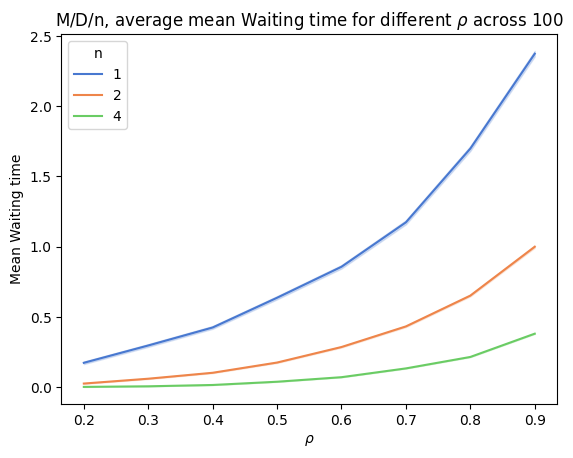

In [53]:
# Plot convergence of waiting time with increasing rho (M/H/n)

rho_observed = sim_results_hyper['rho'].max()

sim_results_subset = sim_results_hyper[sim_results_hyper['rho'] == rho_observed]
for n in n_range:
    sim_results_subset_n = sim_results_subset[sim_results_subset['n'] == n]
    print(f"Mean waiting time for {n} servers rho = {rho_observed}: {sim_results_subset_n['wait_delta'].mean()}")

fig, ax = plt.subplots()
sns.lineplot(sim_results_hyper, x='rho', y='wait_delta', palette='muted', hue='n', errorbar=('ci', 95), ax=ax)
ax.set_xlabel('$\\rho$')
ax.set_ylabel('Mean Waiting time')
ax.set_title(f'M/D/n, average mean Waiting time for different $\\rho$ across {n_sims}')
# ax.invert_yaxis()

### 1.7 Comparison of Strategies

In [137]:
sim_results_priority

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta
0,1,0.2,0,0,2.553071,2.553071,2.617752,0.000000
1,1,0.2,0,1,4.533587,4.533587,5.367334,0.000000
2,1,0.2,0,2,6.795840,6.795840,7.963116,0.000000
3,1,0.2,0,3,11.206193,11.206193,11.911122,0.000000
4,1,0.2,0,4,13.150413,13.150413,13.601816,0.000000
...,...,...,...,...,...,...,...,...
3079999,4,0.9,99,3650,999.227109,999.345580,999.933067,0.118471
3080000,4,0.9,99,3651,999.398054,999.443704,999.538618,0.045650
3080001,4,0.9,99,3652,999.409124,999.933067,NaN,0.523943
3080002,4,0.9,99,3653,999.484882,999.538618,999.898068,0.053736


In [136]:
sim_results_part4[]

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta
0,1,0.2,0,0,2.553071,2.553071,2.617752,0.000000
1,1,0.2,0,1,4.533587,4.533587,5.367334,0.000000
2,1,0.2,0,2,6.795840,6.795840,7.963116,0.000000
3,1,0.2,0,3,11.206193,11.206193,11.911122,0.000000
4,1,0.2,0,4,13.150413,13.150413,13.601816,0.000000
...,...,...,...,...,...,...,...,...
3079999,4,0.9,99,3650,999.227109,999.345580,999.933067,0.118471
3080000,4,0.9,99,3651,999.398054,999.443704,999.538618,0.045650
3080001,4,0.9,99,3652,999.409124,999.933067,NaN,0.523943
3080002,4,0.9,99,3653,999.484882,999.538618,999.898068,0.053736


Text(0.5, 1.0, 'Average mean Waiting time for different strategies & $\\rho$ across 100 sims, t = 1000 timesteps')

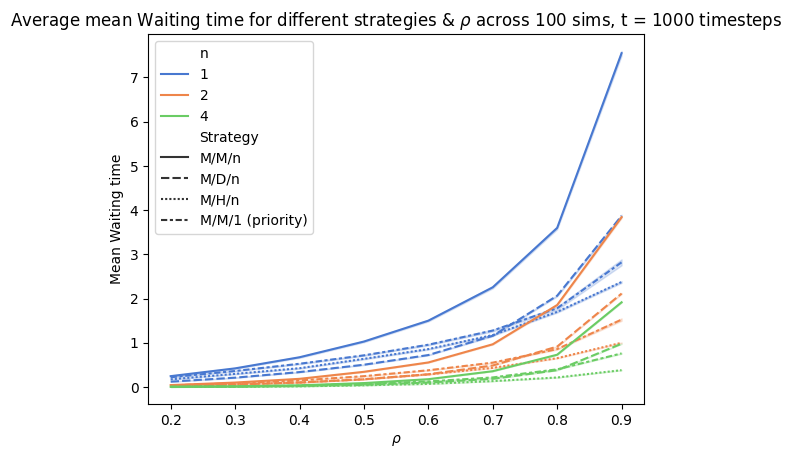

In [138]:
# Combine convergence plots

rho_observed = sim_results_hyper['rho'].max()

sim_results_part1 = sim_results.copy()
sim_results_part1['Strategy'] = 'M/M/n'
sim_results_part2 = sim_results_determ.copy()
sim_results_part2['Strategy'] = 'M/D/n'
sim_results_part3 = sim_results_hyper.copy()
sim_results_part3['Strategy'] = 'M/H/n'
sim_results_part4 = sim_results_priority.copy()
sim_results_part4['Strategy'] = 'M/M/1 (priority)'

sim_results_all = pd.concat([sim_results_part1, sim_results_part2, sim_results_part3, sim_results_part4], ignore_index=True)

fig, ax = plt.subplots()
sns.lineplot(sim_results_all, x='rho', y='wait_delta', palette='muted', hue='n', errorbar=('ci', 95), style='Strategy', ax=ax)
ax.set_xlabel('$\\rho$')
ax.set_ylabel('Mean Waiting time')
ax.set_title(f'Average mean Waiting time for different strategies & $\\rho$ across {n_sims} sims, t = 1000 timesteps')
# ax.invert_yaxis()

## 2. Convergence Studies

The procedure below calculates the number of simulations needed until a specific width of the confidence interval is obtained. 

In [46]:
t_max = 1000
time_steps = 10  # Number of time intervals
step_size = t_max / time_steps  # Calculate the size of each time step


# Initializing dictionaries to store results
results = {}  # Stores results for different 'n' values
results_over_multiple_sims = {} # Stores aggregated results across multiple simulations
results_over_incrementing_timesteps = {}

# Cleaning the data: removing rows where 'wait_delta' is null
sim_results_clean = sim_results[sim_results['wait_delta'].isnull() == False]

# Iterating over a range of 'n' values
for i, n in enumerate(n_range):
    results[n] = {}  # Initializing a sub-dictionary for each 'n' value
    results_over_multiple_sims[n] = {}
    results_over_incrementing_timesteps[n] = {}
    # Filtering the dataset for the current 'n' value
    sim_results_subset_n = sim_results_clean[sim_results_clean['n'] == n]
    
    # Iterating over a range of 'rho' values
    for j, rho in enumerate(rho_range):
        results[n][rho] = {}  # Initializing a sub-dictionary for each 'rho' value
        results_over_multiple_sims[n][rho] = {}
        results_over_incrementing_timesteps[n][rho] = {}
        # Filtering the dataset for the current 'rho' value
        sim_results_subset_rho = sim_results_subset_n[sim_results_subset_n['rho'] == rho]

        # Processing each unique simulation ID
        for sim_id in sim_results_subset_rho['simID'].unique():
            results[n][rho][sim_id] = {}  # Initializing a sub-dictionary for each 'simID'
            results_over_multiple_sims[n][rho][sim_id] = {}
            results_over_incrementing_timesteps[n][rho][sim_id] = {}

            # Filtering the dataset for the current simulation ID
            sim_results_subset_sim_id = sim_results_subset_rho[sim_results_subset_rho['simID'] == sim_id]

            # Adding a cumulative sum column for simIDs to help in data selection
            sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()

            # Identifying the cumulative number for the current simID
            current_cumulative_number = sim_results_subset_rho[sim_results_subset_rho['simID'] == sim_id]['cumulative_sim_id'].iloc[0]

            # Creating a mask to filter rows up to the current simID
            cumulative_mask = sim_results_subset_rho['cumulative_sim_id'] <= current_cumulative_number

            # Applying the mask to get a subset of results incrementally adding simulations
            sim_results_subset_incrementally_adding_sims = sim_results_subset_rho.loc[cumulative_mask]

            # Outputting the length of the subset for debugging or information purposes
            print(len(sim_results_subset_incrementally_adding_sims))

            # Calculating the confidence interval for the 'wait_delta' of the incrementally added simulations
            ci_increment = st.norm.interval(confidence=0.95, loc=sim_results_subset_incrementally_adding_sims['wait_delta'].mean(), scale=sim_results_subset_incrementally_adding_sims['wait_delta'].sem())

            # Storing the confidence interval and sample data in the results dictionary
            results_over_multiple_sims[n][rho][sim_id] = {'ci': ci_increment, 'sample': sim_results_subset_incrementally_adding_sims}

            # Iterating over each sample index
            for sample_index in range(len(sim_results_subset_sim_id)):
                # Calculating the confidence interval for each sample
                ci = st.norm.interval(confidence=0.95, loc=sim_results_subset_sim_id['wait_delta'][:sample_index].mean(), scale=sim_results_subset_sim_id['wait_delta'][:sample_index].sem())

                # Extracting the sample data for the current index
                sample_data = sim_results_subset_sim_id['wait_delta'].iloc[sample_index]

                # Storing the confidence interval and sample data for each sample index
                results[n][rho][sim_id][sample_index] = {'ci': ci, 'sample': sample_data}


            for t_step in range(1, time_steps + 1):
                # Define the upper limit of the current time interval
                current_time_limit = step_size * t_step

                # Filter samples based on the current time condition
                filtered_samples = sim_results_subset_sim_id[sim_results_subset_sim_id['arr_time'] <= current_time_limit]
                print(current_time_limit)
                print(len(filtered_samples))

                # Check if there are enough samples to calculate the confidence interval
                if len(filtered_samples) > 1:
                    # Calculate the confidence interval for the filtered samples
                    ci = st.norm.interval(confidence=0.95, loc=filtered_samples['wait_delta'].mean(), scale=filtered_samples['wait_delta'].sem())

                    # Store the confidence interval and the filtered samples
                    results_over_incrementing_timesteps[n][rho][sim_id][current_time_limit] = {'ci': ci, 'samples': filtered_samples}
                else:
                    # Handle cases with insufficient samples
                    results_over_incrementing_timesteps[n][rho][sim_id][current_time_limit] = {'ci': None, 'samples': []}

# Accessing a specific result 'results_over_incrementing_timesteps' in can be done using the dictionary structure: results_over_incrementing_timesteps[n][rho][sim_id][current_time_limit]
# Accessing a specific result in 'results_over_multiple_sims' can be done using the dictionary structure: results_over_multiple_sims[n][rho][sim_id]
# Accessing a specific result in 'results' can be done using the dictionary structure: results[n][rho][sim_id][sample_index]


C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


202
100.0
22
200.0
42
300.0
65
400.0
91
500.0
108
600.0
128
700.0
150
800.0
170
900.0
184
1000.0
202
203
100.0
16
200.0
43
300.0
60
400.0
90
500.0
114
600.0
141
700.0
161
800.0
176
900.0
185
1000.0
206
409
100.0
17
200.0
41
300.0
65
400.0
81
500.0
101
600.0
126
700.0
154
800.0
176
900.0
202
1000.0
220
629
100.0
14
200.0
41
300.0
68
400.0
83
500.0
96
600.0
118
700.0
142
800.0
167
900.0
191
1000.0
205
834
100.0
20
200.0
34
300.0
54
400.0
72
500.0
87
600.0
103
700.0
115
800.0
129
900.0
147
1000.0
167
1001
100.0
16
200.0
33
300.0
52
400.0
71
500.0
86
600.0
105
700.0
125
800.0
142
900.0
164
1000.0
184
1185
100.0
16
200.0
33
300.0
53
400.0
69
500.0
80
600.0
100
700.0
122
800.0
138
900.0
165
1000.0
195
1380
100.0
27
200.0
44
300.0
63
400.0
79
500.0
95
600.0
127
700.0
147
800.0
164
900.0
184
1000.0
209
1589
100.0
21
200.0
36
300.0
58
400.0
76
500.0
100
600.0
110
700.0
130
800.0
146
900.0
162
1000.0
179
1768
100.0
20
200.0
43
300.0
60
400.0
73
500.0
94
600.0
112
700.0
120
800.0
138
900.0
165
10

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
44
200.0
79
300.0
120
400.0
159
500.0
193
600.0
233
700.0
271
800.0
316
900.0
353
1000.0
394
395
100.0
34
200.0
75
300.0
125
400.0
165
500.0
196
600.0
235
700.0
270
800.0
310
900.0
344
1000.0
379
774
100.0
35
200.0
62
300.0
105
400.0
146
500.0
187
600.0
227
700.0
255
800.0
305
900.0
346
1000.0
386
1160
100.0
40
200.0
78
300.0
108
400.0
141
500.0
180
600.0
211
700.0
249
800.0
295
900.0
329
1000.0
361
1521
100.0
30
200.0
66
300.0
105
400.0
142
500.0
178
600.0
225
700.0
256
800.0
301
900.0
347
1000.0
386
1907
100.0
33
200.0
68
300.0
99
400.0
129
500.0
170
600.0
202
700.0
245
800.0
281
900.0
323
1000.0
371
2278
100.0
36
200.0
75
300.0
118
400.0
159
500.0
195
600.0
230
700.0
267
800.0
312
900.0
357
1000.0
405
2683
100.0
42
200.0
88
300.0
139
400.0
185
500.0
225
600.0
271
700.0
309
800.0
349
900.0
392
1000.0
437
3120
100.0
38
200.0
84
300.0
131
400.0
163
500.0
196
600.0
248
700.0
288
800.0
335
900.0
376
1000.0
413
3533
100.0
32
200.0
66
300.0
111
400.0
160
500.0
207
600.0
256
700.0
309

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
49
200.0
103
300.0
156
400.0
198
500.0
255
600.0
302
700.0
347
800.0
405
900.0
457
1000.0
495
1024
100.0
61
200.0
112
300.0
162
400.0
204
500.0
261
600.0
309
700.0
363
800.0
415
900.0
470
1000.0
537
1561
100.0
46
200.0
94
300.0
141
400.0
189
500.0
235
600.0
287
700.0
346
800.0
403
900.0
460
1000.0
506
2067
100.0
56
200.0
111
300.0
162
400.0
209
500.0
256
600.0
301
700.0
348
800.0
378
900.0
432
1000.0
482
2549
100.0
42
200.0
89
300.0
146
400.0
191
500.0
235
600.0
298
700.0
347
800.0
396
900.0
454
1000.0
505
3054
100.0
45
200.0
94
300.0
156
400.0
203
500.0
248
600.0
302
700.0
355
800.0
410
900.0
464
1000.0
520
3574
100.0
49
200.0
97
300.0
154
400.0
205
500.0
255
600.0
299
700.0
346
800.0
394
900.0
430
1000.0
481
4055
100.0
51
200.0
110
300.0
145
400.0
192
500.0
236
600.0
288
700.0
339
800.0
385
900.0
436
1000.0
490
4545
100.0
43
200.0
97
300.0
139
400.0
180
500.0
228
600.0
274
700.0
322
800.0
379
900.0
425
1000.0
489
5034
100.0
55
200.0
99
300.0
147
400.0
185
500.0
229
600.0
277
70

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
53
200.0
120
300.0
188
400.0
236
500.0
303
600.0
353
700.0
406
800.0
475
900.0
526
1000.0
594
1226
100.0
61
200.0
131
300.0
180
400.0
229
500.0
302
600.0
369
700.0
430
800.0
494
900.0
547
1000.0
603
1829
100.0
52
200.0
113
300.0
159
400.0
223
500.0
283
600.0
349
700.0
402
800.0
465
900.0
534
1000.0
591
2420
100.0
62
200.0
125
300.0
187
400.0
243
500.0
292
600.0
356
700.0
415
800.0
473
900.0
521
1000.0
583
3003
100.0
67
200.0
120
300.0
183
400.0
249
500.0
309
600.0
360
700.0
417
800.0
479
900.0
543
1000.0
598
3601
100.0
60
200.0
117
300.0
178
400.0
231
500.0
280
600.0
327
700.0
394
800.0
444
900.0
501
1000.0
568
4169
100.0
68
200.0
122
300.0
187
400.0
241
500.0
303
600.0
362
700.0
419
800.0
487
900.0
561
1000.0
622
4791
100.0
53
200.0
96
300.0
158
400.0
214
500.0
265
600.0
324
700.0
383
800.0
439
900.0
496
1000.0
554
5345
100.0
58
200.0
113
300.0
158
400.0
237
500.0
286
600.0
335
700.0
389
800.0
460
900.0
519
1000.0
581
5926
100.0
62
200.0
141
300.0
192
400.0
263
500.0
322
600.0
3

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
76
200.0
135
300.0
223
400.0
295
500.0
368
600.0
442
700.0
515
800.0
591
900.0
662
1000.0
731
1402
100.0
76
200.0
151
300.0
216
400.0
286
500.0
341
600.0
419
700.0
482
800.0
556
900.0
622
1000.0
695
2097
100.0
61
200.0
119
300.0
178
400.0
246
500.0
309
600.0
374
700.0
454
800.0
527
900.0
603
1000.0
672
2769
100.0
76
200.0
146
300.0
208
400.0
270
500.0
342
600.0
410
700.0
474
800.0
549
900.0
630
1000.0
701
3470
100.0
75
200.0
159
300.0
219
400.0
290
500.0
364
600.0
436
700.0
493
800.0
553
900.0
634
1000.0
711
4181
100.0
69
200.0
142
300.0
208
400.0
268
500.0
346
600.0
413
700.0
482
800.0
542
900.0
600
1000.0
683
4864
100.0
69
200.0
139
300.0
202
400.0
274
500.0
351
600.0
416
700.0
492
800.0
564
900.0
628
1000.0
689
5553
100.0
70
200.0
137
300.0
200
400.0
275
500.0
355
600.0
412
700.0
488
800.0
553
900.0
605
1000.0
663
6216
100.0
52
200.0
126
300.0
184
400.0
247
500.0
312
600.0
370
700.0
428
800.0
504
900.0
571
1000.0
650
6866
100.0
59
200.0
133
300.0
212
400.0
273
500.0
344
600.0


C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


821
100.0
95
200.0
178
300.0
258
400.0
343
500.0
425
600.0
502
700.0
582
800.0
663
900.0
742
1000.0
821
822
100.0
79
200.0
166
300.0
242
400.0
328
500.0
412
600.0
501
700.0
571
800.0
665
900.0
740
1000.0
820
1642
100.0
90
200.0
176
300.0
260
400.0
346
500.0
420
600.0
510
700.0
580
800.0
662
900.0
745
1000.0
827
2469
100.0
83
200.0
150
300.0
243
400.0
311
500.0
392
600.0
465
700.0
536
800.0
615
900.0
686
1000.0
755
3224
100.0
75
200.0
157
300.0
252
400.0
329
500.0
406
600.0
482
700.0
551
800.0
647
900.0
720
1000.0
792
4016
100.0
83
200.0
159
300.0
250
400.0
327
500.0
399
600.0
481
700.0
546
800.0
609
900.0
688
1000.0
774
4790
100.0
67
200.0
138
300.0
216
400.0
299
500.0
386
600.0
462
700.0
541
800.0
615
900.0
692
1000.0
760
5550
100.0
78
200.0
160
300.0
221
400.0
305
500.0
388
600.0
488
700.0
563
800.0
633
900.0
711
1000.0
789
6339
100.0
85
200.0
171
300.0
253
400.0
341
500.0
417
600.0
494
700.0
579
800.0
654
900.0
733
1000.0
803
7142
100.0
88
200.0
169
300.0
252
400.0
339
500.0
427
600

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
89
200.0
191
300.0
281
400.0
371
500.0
470
600.0
560
700.0
636
800.0
716
900.0
807
1000.0
903
904
100.0
85
200.0
168
300.0
251
400.0
341
500.0
420
600.0
524
700.0
613
800.0
705
900.0
791
1000.0
903
1807
100.0
85
200.0
171
300.0
261
400.0
355
500.0
485
600.0
575
700.0
671
800.0
791
900.0
890
1000.0
906
2713
100.0
78
200.0
158
300.0
236
400.0
315
500.0
397
600.0
480
700.0
573
800.0
658
900.0
738
1000.0
827
3540
100.0
95
200.0
178
300.0
278
400.0
376
500.0
462
600.0
547
700.0
645
800.0
744
900.0
840
1000.0
907
4447
100.0
99
200.0
199
300.0
302
400.0
394
500.0
489
600.0
574
700.0
670
800.0
762
900.0
840
1000.0
926
5373
100.0
89
200.0
190
300.0
290
400.0
387
500.0
480
600.0
584
700.0
677
800.0
765
900.0
846
1000.0
932
6305
100.0
95
200.0
181
300.0
283
400.0
367
500.0
453
600.0
547
700.0
647
800.0
719
900.0
797
1000.0
878
7183
100.0
88
200.0
170
300.0
265
400.0
363
500.0
454
600.0
544
700.0
646
800.0
733
900.0
822
1000.0
898
8081
100.0
95
200.0
186
300.0
286
400.0
383
500.0
466
600.0
5

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
39
200.0
78
300.0
118
400.0
142
500.0
184
600.0
220
700.0
261
800.0
305
900.0
343
1000.0
381
814
100.0
25
200.0
63
300.0
106
400.0
141
500.0
194
600.0
235
700.0
269
800.0
310
900.0
358
1000.0
389
1203
100.0
29
200.0
75
300.0
105
400.0
143
500.0
181
600.0
231
700.0
273
800.0
317
900.0
360
1000.0
405
1608
100.0
37
200.0
85
300.0
126
400.0
152
500.0
184
600.0
216
700.0
253
800.0
303
900.0
340
1000.0
375
1983
100.0
33
200.0
76
300.0
125
400.0
160
500.0
198
600.0
241
700.0
275
800.0
310
900.0
341
1000.0
384
2367
100.0
59
200.0
108
300.0
143
400.0
178
500.0
221
600.0
261
700.0
304
800.0
346
900.0
376
1000.0
415
2782
100.0
29
200.0
68
300.0
105
400.0
149
500.0
188
600.0
238
700.0
278
800.0
325
900.0
369
1000.0
419
3201
100.0
34
200.0
73
300.0
102
400.0
148
500.0
185
600.0
219
700.0
251
800.0
289
900.0
334
1000.0
379
3580
100.0
39
200.0
77
300.0
117
400.0
157
500.0
189
600.0
226
700.0
266
800.0
300
900.0
334
1000.0
365
3945
100.0
40
200.0
83
300.0
126
400.0
164
500.0
199
600.0
237
700.0


C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


814
100.0
81
200.0
161
300.0
249
400.0
335
500.0
422
600.0
507
700.0
585
800.0
662
900.0
744
1000.0
814
815
100.0
101
200.0
178
300.0
261
400.0
353
500.0
433
600.0
499
700.0
570
800.0
657
900.0
726
1000.0
818
1633
100.0
66
200.0
147
300.0
223
400.0
304
500.0
381
600.0
474
700.0
561
800.0
646
900.0
715
1000.0
811
2444
100.0
72
200.0
164
300.0
231
400.0
314
500.0
383
600.0
466
700.0
543
800.0
621
900.0
709
1000.0
784
3228
100.0
91
200.0
170
300.0
261
400.0
332
500.0
421
600.0
495
700.0
572
800.0
655
900.0
727
1000.0
814
4042
100.0
96
200.0
158
300.0
238
400.0
318
500.0
396
600.0
470
700.0
552
800.0
625
900.0
679
1000.0
759
4801
100.0
72
200.0
158
300.0
242
400.0
327
500.0
403
600.0
488
700.0
589
800.0
664
900.0
734
1000.0
815
5616
100.0
80
200.0
163
300.0
230
400.0
304
500.0
371
600.0
457
700.0
537
800.0
616
900.0
711
1000.0
798
6414
100.0
70
200.0
145
300.0
223
400.0
300
500.0
378
600.0
455
700.0
529
800.0
598
900.0
668
1000.0
751
7165
100.0
78
200.0
161
300.0
243
400.0
336
500.0
408
60

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
94
200.0
195
300.0
298
400.0
390
500.0
478
600.0
574
700.0
679
800.0
790
900.0
893
1000.0
978
979
100.0
111
200.0
217
300.0
315
400.0
429
500.0
538
600.0
635
700.0
718
800.0
824
900.0
932
1000.0
1018
1997
100.0
95
200.0
197
300.0
281
400.0
379
500.0
489
600.0
571
700.0
686
800.0
784
900.0
896
1000.0
1003
3000
100.0
110
200.0
212
300.0
305
400.0
402
500.0
501
600.0
588
700.0
693
800.0
780
900.0
885
1000.0
981
3981
100.0
105
200.0
220
300.0
323
400.0
424
500.0
513
600.0
633
700.0
730
800.0
832
900.0
939
1000.0
1048
5029
100.0
107
200.0
213
300.0
310
400.0
404
500.0
516
600.0
623
700.0
734
800.0
833
900.0
932
1000.0
1027
6056
100.0
107
200.0
207
300.0
306
400.0
404
500.0
491
600.0
602
700.0
711
800.0
808
900.0
921
1000.0
1031
7087
100.0
109
200.0
232
300.0
321
400.0
403
500.0
511
600.0
614
700.0
707
800.0
792
900.0
892
1000.0
992
8079
100.0
102
200.0
195
300.0
306
400.0
410
500.0
513
600.0
620
700.0
730
800.0
828
900.0
926
1000.0
1033
9112
100.0
99
200.0
191
300.0
299
400.0
405
500.

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
119
200.0
234
300.0
356
400.0
454
500.0
545
600.0
657
700.0
795
800.0
913
900.0
1037
1000.0
1173
1174
100.0
133
200.0
257
300.0
359
400.0
494
500.0
612
600.0
735
700.0
831
800.0
947
900.0
1075
1000.0
1179
2353
100.0
117
200.0
214
300.0
329
400.0
454
500.0
575
600.0
687
700.0
788
800.0
930
900.0
1037
1000.0
1142
3495
100.0
131
200.0
249
300.0
389
400.0
519
500.0
636
600.0
754
700.0
876
800.0
991
900.0
1099
1000.0
1216
4711
100.0
135
200.0
256
300.0
362
400.0
502
500.0
632
600.0
748
700.0
866
800.0
1000
900.0
1117
1000.0
1259
5970
100.0
117
200.0
260
300.0
395
400.0
520
500.0
642
600.0
789
700.0
931
800.0
1058
900.0
1186
1000.0
1296
7266
100.0
109
200.0
253
300.0
377
400.0
495
500.0
622
600.0
764
700.0
868
800.0
987
900.0
1099
1000.0
1198
8464
100.0
132
200.0
254
300.0
352
400.0
476
500.0
594
600.0
688
700.0
806
800.0
923
900.0
1036
1000.0
1159
9623
100.0
126
200.0
259
300.0
364
400.0
491
500.0
602
600.0
707
700.0
819
800.0
929
900.0
1034
1000.0
1164
10787
100.0
104
200.0
212
300.0

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
110
200.0
251
300.0
399
400.0
554
500.0
719
600.0
878
700.0
1017
800.0
1158
900.0
1307
1000.0
1446
1447
100.0
141
200.0
292
300.0
420
400.0
541
500.0
715
600.0
852
700.0
1003
800.0
1161
900.0
1293
1000.0
1417
2864
100.0
108
200.0
243
300.0
374
400.0
522
500.0
673
600.0
802
700.0
967
800.0
1109
900.0
1249
1000.0
1402
4266
100.0
161
200.0
328
300.0
450
400.0
583
500.0
711
600.0
848
700.0
977
800.0
1109
900.0
1270
1000.0
1418
5684
100.0
128
200.0
279
300.0
433
400.0
553
500.0
700
600.0
842
700.0
986
800.0
1138
900.0
1293
1000.0
1414
7098
100.0
121
200.0
242
300.0
382
400.0
532
500.0
677
600.0
822
700.0
968
800.0
1128
900.0
1264
1000.0
1411
8509
100.0
135
200.0
275
300.0
436
400.0
564
500.0
710
600.0
843
700.0
987
800.0
1133
900.0
1273
1000.0
1403
9912
100.0
140
200.0
258
300.0
392
400.0
533
500.0
685
600.0
855
700.0
992
800.0
1121
900.0
1290
1000.0
1439
11351
100.0
143
200.0
269
300.0
401
400.0
560
500.0
704
600.0
843
700.0
989
800.0
1114
900.0
1255
1000.0
1381
12732
100.0
147
200.0

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
155
200.0
337
300.0
502
400.0
654
500.0
806
600.0
953
700.0
1123
800.0
1265
900.0
1400
1000.0
1570
1571
100.0
138
200.0
296
300.0
469
400.0
644
500.0
821
600.0
968
700.0
1141
800.0
1308
900.0
1473
1000.0
1637
3208
100.0
188
200.0
353
300.0
530
400.0
683
500.0
817
600.0
979
700.0
1133
800.0
1275
900.0
1433
1000.0
1610
4818
100.0
146
200.0
292
300.0
460
400.0
630
500.0
805
600.0
964
700.0
1152
800.0
1321
900.0
1463
1000.0
1607
6425
100.0
179
200.0
340
300.0
499
400.0
673
500.0
838
600.0
1004
700.0
1188
800.0
1332
900.0
1480
1000.0
1645
8070
100.0
199
200.0
351
300.0
514
400.0
658
500.0
816
600.0
942
700.0
1099
800.0
1248
900.0
1390
1000.0
1560
9630
100.0
156
200.0
306
300.0
446
400.0
615
500.0
781
600.0
935
700.0
1095
800.0
1262
900.0
1414
1000.0
1573
11203
100.0
151
200.0
308
300.0
455
400.0
627
500.0
788
600.0
949
700.0
1108
800.0
1278
900.0
1415
1000.0
1581
12784
100.0
164
200.0
304
300.0
478
400.0
628
500.0
780
600.0
946
700.0
1122
800.0
1293
900.0
1456
1000.0
1614
14398
100.0


C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
199
200.0
390
300.0
543
400.0
739
500.0
932
600.0
1119
700.0
1293
800.0
1464
900.0
1624
1000.0
1788
1789
100.0
181
200.0
360
300.0
535
400.0
709
500.0
890
600.0
1054
700.0
1237
800.0
1405
900.0
1595
1000.0
1764
3553
100.0
196
200.0
393
300.0
575
400.0
759
500.0
969
600.0
1147
700.0
1329
800.0
1505
900.0
1685
1000.0
1847
5400
100.0
183
200.0
383
300.0
552
400.0
705
500.0
876
600.0
1060
700.0
1237
800.0
1426
900.0
1614
1000.0
1802
7202
100.0
182
200.0
360
300.0
540
400.0
733
500.0
905
600.0
1067
700.0
1257
800.0
1421
900.0
1602
1000.0
1772
8974
100.0
182
200.0
358
300.0
544
400.0
728
500.0
912
600.0
1087
700.0
1282
800.0
1453
900.0
1654
1000.0
1812
10786
100.0
181
200.0
351
300.0
542
400.0
740
500.0
906
600.0
1080
700.0
1288
800.0
1453
900.0
1621
1000.0
1790
12576
100.0
191
200.0
351
300.0
515
400.0
706
500.0
897
600.0
1082
700.0
1265
800.0
1461
900.0
1640
1000.0
1786
14362
100.0
173
200.0
340
300.0
523
400.0
718
500.0
900
600.0
1067
700.0
1243
800.0
1438
900.0
1619
1000.0
1776
161

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
83
200.0
164
300.0
242
400.0
322
500.0
404
600.0
487
700.0
578
800.0
643
900.0
721
1000.0
815
816
100.0
69
200.0
141
300.0
211
400.0
290
500.0
362
600.0
437
700.0
514
800.0
593
900.0
681
1000.0
762
1578
100.0
70
200.0
151
300.0
237
400.0
318
500.0
419
600.0
507
700.0
591
800.0
668
900.0
742
1000.0
825
2403
100.0
79
200.0
163
300.0
256
400.0
332
500.0
413
600.0
493
700.0
579
800.0
657
900.0
748
1000.0
818
3221
100.0
74
200.0
165
300.0
231
400.0
318
500.0
389
600.0
467
700.0
551
800.0
623
900.0
700
1000.0
797
4018
100.0
98
200.0
188
300.0
257
400.0
331
500.0
404
600.0
490
700.0
582
800.0
646
900.0
728
1000.0
804
4822
100.0
79
200.0
152
300.0
230
400.0
312
500.0
392
600.0
479
700.0
559
800.0
657
900.0
736
1000.0
809
5631
100.0
71
200.0
144
300.0
215
400.0
303
500.0
383
600.0
453
700.0
530
800.0
623
900.0
706
1000.0
781
6412
100.0
82
200.0
162
300.0
241
400.0
323
500.0
420
600.0
487
700.0
580
800.0
664
900.0
744
1000.0
814
7226
100.0
93
200.0
193
300.0
271
400.0
362
500.0
445
600.0
5

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


1618
100.0
183
200.0
337
300.0
493
400.0
655
500.0
813
600.0
986
700.0
1174
800.0
1321
900.0
1453
1000.0
1618
1619
100.0
164
200.0
324
300.0
500
400.0
651
500.0
826
600.0
997
700.0
1157
800.0
1312
900.0
1480
1000.0
1645
3264
100.0
164
200.0
327
300.0
491
400.0
632
500.0
801
600.0
959
700.0
1110
800.0
1265
900.0
1436
1000.0
1607
4871
100.0
168
200.0
340
300.0
489
400.0
649
500.0
805
600.0
961
700.0
1121
800.0
1290
900.0
1459
1000.0
1607
6478
100.0
144
200.0
307
300.0
468
400.0
615
500.0
763
600.0
912
700.0
1052
800.0
1223
900.0
1358
1000.0
1507
7985
100.0
166
200.0
327
300.0
511
400.0
654
500.0
835
600.0
1000
700.0
1132
800.0
1309
900.0
1463
1000.0
1631
9616
100.0
156
200.0
316
300.0
471
400.0
632
500.0
777
600.0
954
700.0
1125
800.0
1282
900.0
1445
1000.0
1591
11207
100.0
156
200.0
323
300.0
479
400.0
622
500.0
784
600.0
947
700.0
1094
800.0
1253
900.0
1401
1000.0
1562
12769
100.0
143
200.0
305
300.0
444
400.0
606
500.0
766
600.0
914
700.0
1080
800.0
1242
900.0
1391
1000.0
1586
14355
1

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
181
200.0
392
300.0
586
400.0
792
500.0
1007
600.0
1211
700.0
1404
800.0
1627
900.0
1822
1000.0
2026
2027
100.0
208
200.0
380
300.0
561
400.0
774
500.0
960
600.0
1156
700.0
1358
800.0
1557
900.0
1746
1000.0
1937
3964
100.0
202
200.0
399
300.0
618
400.0
832
500.0
1017
600.0
1213
700.0
1389
800.0
1580
900.0
1780
1000.0
1972
5936
100.0
197
200.0
399
300.0
603
400.0
797
500.0
980
600.0
1169
700.0
1359
800.0
1554
900.0
1741
1000.0
1921
7857
100.0
225
200.0
433
300.0
630
400.0
807
500.0
1002
600.0
1196
700.0
1406
800.0
1599
900.0
1774
1000.0
1984
9841
100.0
199
200.0
413
300.0
606
400.0
783
500.0
943
600.0
1147
700.0
1350
800.0
1555
900.0
1765
1000.0
1953
11794
100.0
198
200.0
406
300.0
598
400.0
806
500.0
1000
600.0
1189
700.0
1406
800.0
1585
900.0
1794
1000.0
1959
13753
100.0
191
200.0
395
300.0
613
400.0
812
500.0
1025
600.0
1219
700.0
1418
800.0
1623
900.0
1835
1000.0
2037
15790
100.0
185
200.0
398
300.0
607
400.0
799
500.0
997
600.0
1198
700.0
1391
800.0
1604
900.0
1792
1000.0
199

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
241
200.0
462
300.0
685
400.0
928
500.0
1190
600.0
1415
700.0
1667
800.0
1898
900.0
2127
1000.0
2395
2396
100.0
241
200.0
485
300.0
721
400.0
963
500.0
1223
600.0
1458
700.0
1693
800.0
1965
900.0
2232
1000.0
2476
4872
100.0
234
200.0
473
300.0
725
400.0
935
500.0
1178
600.0
1406
700.0
1639
800.0
1867
900.0
2143
1000.0
2387
7259
100.0
225
200.0
470
300.0
683
400.0
927
500.0
1181
600.0
1411
700.0
1677
800.0
1904
900.0
2159
1000.0
2413
9672
100.0
233
200.0
486
300.0
746
400.0
999
500.0
1223
600.0
1446
700.0
1685
800.0
1935
900.0
2164
1000.0
2434
12106
100.0
255
200.0
496
300.0
745
400.0
973
500.0
1218
600.0
1471
700.0
1686
800.0
1939
900.0
2168
1000.0
2410
14516
100.0
258
200.0
472
300.0
711
400.0
968
500.0
1214
600.0
1470
700.0
1707
800.0
1981
900.0
2247
1000.0
2482
16998
100.0
245
200.0
487
300.0
703
400.0
945
500.0
1171
600.0
1418
700.0
1640
800.0
1875
900.0
2124
1000.0
2363
19361
100.0
250
200.0
500
300.0
754
400.0
996
500.0
1239
600.0
1514
700.0
1727
800.0
1969
900.0
2220
1000.

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
269
200.0
531
300.0
817
400.0
1090
500.0
1376
600.0
1662
700.0
1976
800.0
2250
900.0
2546
1000.0
2810
2811
100.0
293
200.0
585
300.0
856
400.0
1105
500.0
1387
600.0
1653
700.0
1958
800.0
2237
900.0
2516
1000.0
2788
5599
100.0
278
200.0
537
300.0
797
400.0
1115
500.0
1391
600.0
1658
700.0
1905
800.0
2187
900.0
2437
1000.0
2751
8350
100.0
260
200.0
551
300.0
841
400.0
1132
500.0
1414
600.0
1693
700.0
1976
800.0
2255
900.0
2536
1000.0
2833
11183
100.0
251
200.0
545
300.0
831
400.0
1132
500.0
1438
600.0
1719
700.0
2003
800.0
2268
900.0
2560
1000.0
2845
14028
100.0
274
200.0
546
300.0
833
400.0
1100
500.0
1380
600.0
1666
700.0
1974
800.0
2236
900.0
2508
1000.0
2781
16809
100.0
317
200.0
605
300.0
878
400.0
1137
500.0
1420
600.0
1683
700.0
1971
800.0
2254
900.0
2551
1000.0
2829
19638
100.0
263
200.0
535
300.0
826
400.0
1079
500.0
1351
600.0
1625
700.0
1911
800.0
2205
900.0
2501
1000.0
2824
22462
100.0
278
200.0
574
300.0
852
400.0
1117
500.0
1383
600.0
1634
700.0
1913
800.0
2168
900.0


C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
330
200.0
639
300.0
952
400.0
1272
500.0
1598
600.0
1927
700.0
2250
800.0
2552
900.0
2875
1000.0
3167
3168
100.0
305
200.0
584
300.0
889
400.0
1197
500.0
1528
600.0
1825
700.0
2146
800.0
2445
900.0
2765
1000.0
3070
6238
100.0
336
200.0
646
300.0
945
400.0
1248
500.0
1553
600.0
1890
700.0
2185
800.0
2504
900.0
2843
1000.0
3149
9387
100.0
274
200.0
570
300.0
877
400.0
1174
500.0
1494
600.0
1808
700.0
2129
800.0
2453
900.0
2814
1000.0
3154
12541
100.0
321
200.0
660
300.0
1009
400.0
1349
500.0
1672
600.0
1957
700.0
2259
800.0
2582
900.0
2869
1000.0
3206
15747
100.0
331
200.0
633
300.0
956
400.0
1274
500.0
1554
600.0
1875
700.0
2189
800.0
2509
900.0
2817
1000.0
3143
18890
100.0
345
200.0
690
300.0
1015
400.0
1314
500.0
1657
600.0
1951
700.0
2269
800.0
2619
900.0
2933
1000.0
3262
22152
100.0
340
200.0
681
300.0
1017
400.0
1338
500.0
1642
600.0
1957
700.0
2261
800.0
2591
900.0
2907
1000.0
3207
25359
100.0
279
200.0
616
300.0
914
400.0
1218
500.0
1541
600.0
1838
700.0
2181
800.0
2505
900

C:\Users\nitai\AppData\Local\Temp\ipykernel_10420\2996572730.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_results_subset_rho['cumulative_sim_id'] = sim_results_subset_rho['simID'].cumsum()
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


100.0
355
200.0
724
300.0
1066
400.0
1435
500.0
1791
600.0
2165
700.0
2540
800.0
2891
900.0
3241
1000.0
3592
3593
100.0
343
200.0
700
300.0
1053
400.0
1410
500.0
1812
600.0
2140
700.0
2503
800.0
2902
900.0
3285
1000.0
3609
7202
100.0
363
200.0
718
300.0
1072
400.0
1447
500.0
1823
600.0
2206
700.0
2567
800.0
2975
900.0
3312
1000.0
3645
10847
100.0
355
200.0
749
300.0
1124
400.0
1495
500.0
1841
600.0
2189
700.0
2567
800.0
2928
900.0
3298
1000.0
3635
14482
100.0
349
200.0
733
300.0
1126
400.0
1494
500.0
1833
600.0
2238
700.0
2618
800.0
2983
900.0
3365
1000.0
3674
18156
100.0
349
200.0
684
300.0
1047
400.0
1425
500.0
1794
600.0
2168
700.0
2543
800.0
2881
900.0
3220
1000.0
3574
21730
100.0
371
200.0
726
300.0
1047
400.0
1421
500.0
1782
600.0
2116
700.0
2468
800.0
2820
900.0
3188
1000.0
3552
25282
100.0
342
200.0
691
300.0
1042
400.0
1397
500.0
1742
600.0
2121
700.0
2486
800.0
2838
900.0
3169
1000.0
3542
28824
100.0
359
200.0
720
300.0
1085
400.0
1443
500.0
1798
600.0
2147
700.0
2471
800.0
2

C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\nitai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


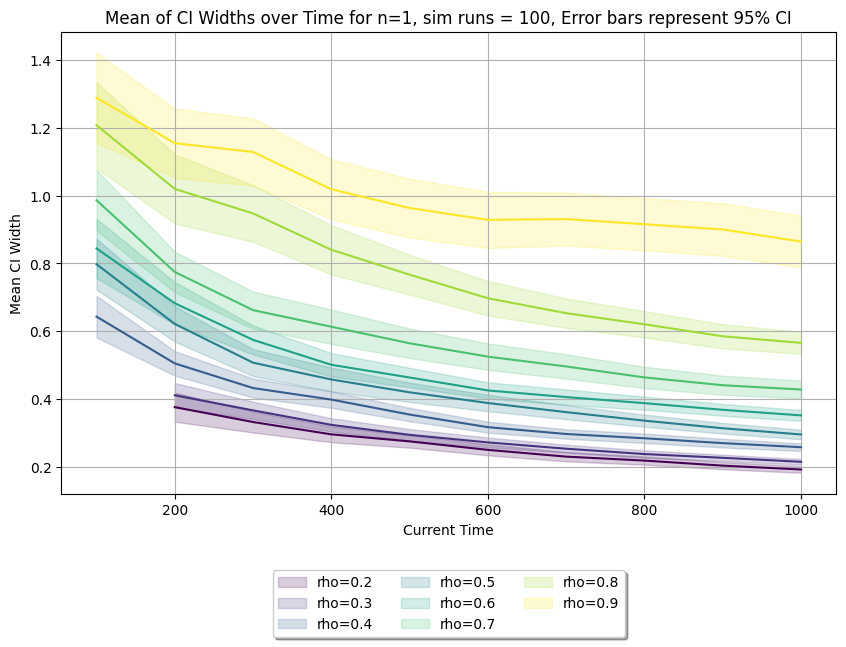

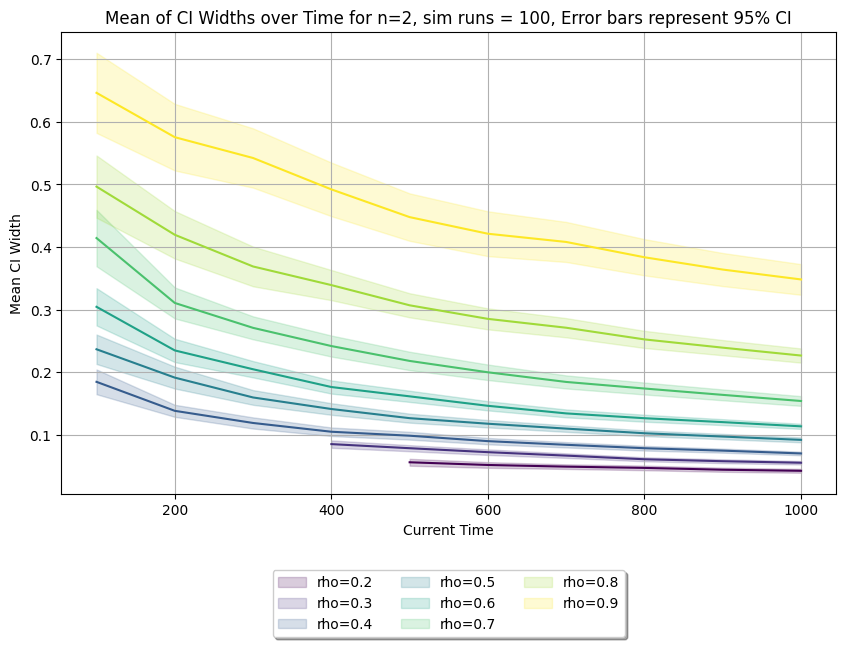

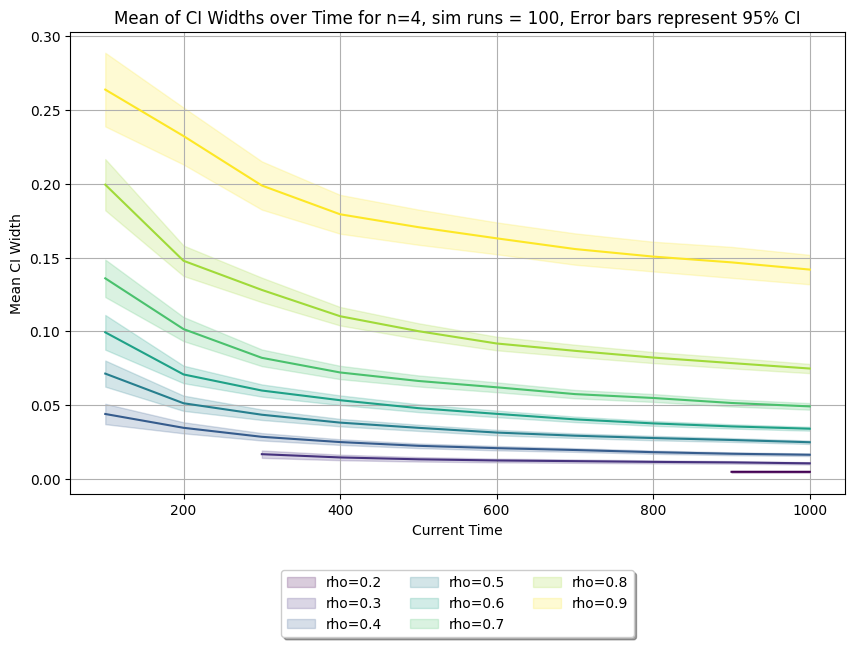

In [81]:

n_sims = len(sim_results_clean['simID'].unique())

for n in [1, 2, 4]:
    # Create a new figure for each n
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    # Iterate through each rho value
    for i, rho in enumerate(sim_results_clean['rho'].unique()):
        # Round rho to three decimal places
        rho_rounded = round(rho, 3)

        # Initialize lists to store mean CI widths and their upper and lower bounds
        mean_ci_widths = []
        lower_bounds = []
        upper_bounds = []

        # Iterate over time steps
        for t_step in range(1, time_steps + 1):
            current_time_limit = step_size * t_step

            # Filter samples for the current time limit and calculate CI width for each simulation
            ci_widths = []
            for sim_id in sim_results_clean['simID'].unique():
                filtered_samples = sim_results_clean[(sim_results_clean['n'] == n) & 
                                                     (sim_results_clean['rho'] == rho) & 
                                                     (sim_results_clean['simID'] == sim_id) &
                                                     (sim_results_clean['arr_time'] <= current_time_limit)]

                if len(filtered_samples) > 1:
                    ci = st.norm.interval(confidence=0.95, loc=filtered_samples['wait_delta'].mean(), scale=filtered_samples['wait_delta'].sem())
                    ci_width = ci[1] - ci[0]
                    ci_widths.append(ci_width)

            # Calculate mean CI width and its confidence interval if there are enough samples
            if ci_widths:
                mean_ci_width = np.mean(ci_widths)
                mean_ci_widths.append(mean_ci_width)

                # Calculate standard error and confidence interval bounds
                sem = st.sem(ci_widths)
                conf_interval = st.norm.interval(0.95, loc=mean_ci_width, scale=sem)
                lower_bounds.append(mean_ci_width - (conf_interval[1] - conf_interval[0]) / 2)
                upper_bounds.append(mean_ci_width + (conf_interval[1] - conf_interval[0]) / 2)
            else:
                mean_ci_widths.append(None)
                lower_bounds.append(None)
                upper_bounds.append(None)

        # Plot mean CI widths with fill between for CI
        plt.fill_between([step_size * t for t in range(1, time_steps + 1)], lower_bounds, upper_bounds, alpha=0.2, label=f'rho={rho_rounded}', color=colors[i % num_rho_values])
        plt.plot([step_size * t for t in range(1, time_steps + 1)], mean_ci_widths, color=colors[i % num_rho_values])

    # Customize the plot
    plt.xlabel('Current Time')
    plt.ylabel('Mean CI Width')
    plt.title(f'Mean of CI Widths over Time for n={n}, sim runs = {n_sims}, Error bars represent 95% CI')
    plt.grid(True)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)  # Adjust the number of columns in legend as needed

    # Display the plot for each n
    plt.show()

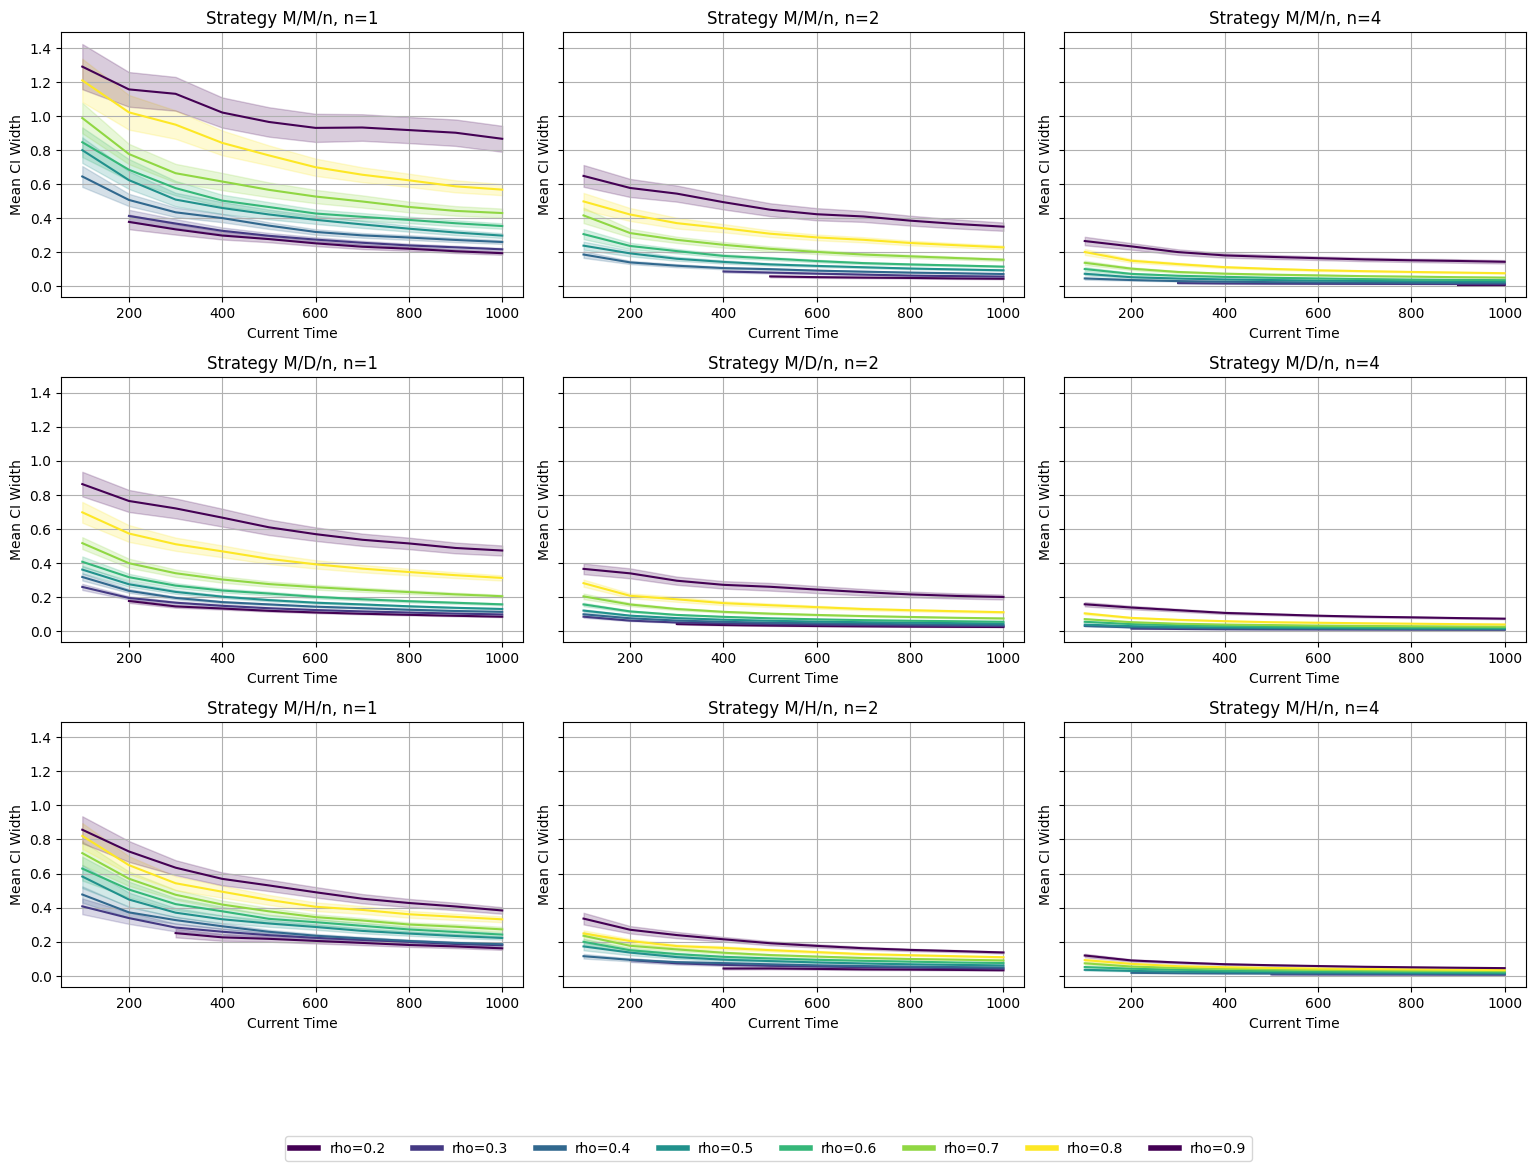

In [148]:


colors = plt.cm.viridis(np.linspace(0, 1, num_rho_values))

# Create the subplot grid before the loops
fig, axs = plt.subplots(3, 3, figsize=(16, 12), sharey=True)

# Loop through each strategy
for strategy_idx, strategy in enumerate(sim_results_clean_all_strats['Strategy'].unique()):
    # Loop through each n value
    for n_idx, n in enumerate([1, 2, 4]):

        sim_results_clean_strat = sim_results_clean_all_strats[(sim_results_clean_all_strats['Strategy'] == strategy) & (sim_results_clean_all_strats['n'] == n)]

        # Iterate through each rho value
        for i, rho in enumerate(sim_results_clean_strat['rho'].unique()):
            rho_rounded = round(rho, 3)

            # Initialize lists to store mean CI widths and their upper and lower bounds
            mean_ci_widths = []
            lower_bounds = []
            upper_bounds = []
            
            # Iterate over time steps
            for t_step in range(1, time_steps + 1):
                current_time_limit = step_size * t_step

                # Filter samples for the current time limit and calculate CI width for each simulation
                ci_widths = []
                for sim_id in sim_results_clean_strat['simID'].unique():
                    filtered_samples = sim_results_clean_strat[(sim_results_clean_strat['n'] == n) & 
                                                               (sim_results_clean_strat['rho'] == rho) & 
                                                               (sim_results_clean_strat['simID'] == sim_id) &
                                                               (sim_results_clean_strat['arr_time'] <= current_time_limit)]

                    if len(filtered_samples) > 1:
                        ci = st.norm.interval(confidence=0.95, loc=filtered_samples['wait_delta'].mean(), scale=filtered_samples['wait_delta'].sem())
                        ci_width = ci[1] - ci[0]
                        ci_widths.append(ci_width)

                # Calculate mean CI width and its confidence interval if there are enough samples
                if ci_widths:
                    mean_ci_width = np.mean(ci_widths)
                    mean_ci_widths.append(mean_ci_width)

                    # Calculate standard error and confidence interval bounds
                    sem = st.sem(ci_widths)
                    conf_interval = st.norm.interval(0.95, loc=mean_ci_width, scale=sem)
                    lower_bounds.append(mean_ci_width - (conf_interval[1] - conf_interval[0]) / 2)
                    upper_bounds.append(mean_ci_width + (conf_interval[1] - conf_interval[0]) / 2)
                else:
                    mean_ci_widths.append(np.nan)
                    lower_bounds.append(np.nan)
                    upper_bounds.append(np.nan)

            # Select the subplot to draw on
            ax = axs[strategy_idx, n_idx]

            # Plot mean CI widths with fill between for CI
            ax.fill_between([step_size * t for t in range(1, time_steps + 1)], lower_bounds, upper_bounds, alpha=0.2, label=f'rho={rho_rounded}', color=colors[i % num_rho_values])
            ax.plot([step_size * t for t in range(1, time_steps + 1)], mean_ci_widths, color=colors[i % num_rho_values])

            # Customize the subplot
            ax.set_xlabel('Current Time')
            ax.set_ylabel('Mean CI Width')
            ax.set_title(f'Strategy {strategy}, n={n}')
            ax.grid(True)
    
# Create legend handles
legend_handles = []
for i, rho in enumerate(sim_results_clean_strat['rho'].unique()):
    rho_rounded = round(rho, 3)
    color_patch = plt.Line2D([0], [0], color=colors[i % num_rho_values], lw=4, label=f'rho={rho_rounded}')
    legend_handles.append(color_patch)

# Place the legend below the figure
fig.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(legend_handles))

# Adjust the layout to prevent overlap and display the entire grid
plt.tight_layout(pad=3.0, h_pad=1.0, w_pad=1.0, rect=[0, 0.03, 1, 0.95])  
plt.show()